In [0]:
%pylab inline

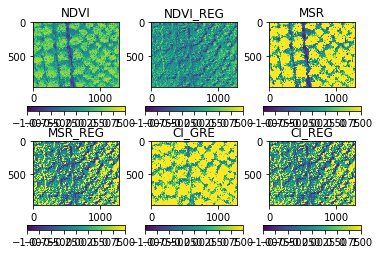

In [49]:
import dataiku
import numpy as np
from dataiku import pandasutils as pdu
import pandas as pd
import matplotlib.pyplot as plt
# Get paths to folder and separate spectral bands
images= dataiku.Folder("ErE6h3Lf")
path_to_folder = images.get_path()
path_to_images = images.list_paths_in_partition()
# Read all bands and store in one 3D array
all_bands = np.zeros([960,1280,4])
for i in range(0, 4):
    p = path_to_folder+path_to_images[i]
    all_bands[:,:,i] = plt.imread(p)
# Compute Vegetation Indices
I_GRE = all_bands[:,:,0]
I_RED = all_bands[:,:,1]
I_REG = all_bands[:,:,2]
I_NIR = all_bands[:,:,3]
np.seterr(divide='ignore', invalid='ignore')
NDVI = (I_NIR - I_RED)/(I_NIR + I_RED)
NDVI[np.isinf(NDVI)] = np.nan 
NDVI_REG = (I_NIR - I_REG)/(I_NIR + I_REG)
NDVI_REG[np.isinf(NDVI_REG)] = np.nan 
MSR = ((I_NIR /I_RED)-1)/(((I_NIR/I_RED)+1)**(1/2))
MSR[np.isinf(MSR)] = np.nan 
MSR_REG = ((I_NIR /I_REG)-1)/(((I_NIR/I_REG)+1)**(1/2))
MSR_REG[np.isinf(MSR_REG)] = np.nan 
CI_GRE = (I_NIR/I_GRE)-1
CI_GRE[np.isinf(CI_GRE)] = np.nan 
CI_REG = (I_NIR/I_REG)-1
CI_REG[np.isinf(CI_REG)] = np.nan 


plt.subplot(2,3,1), plt.imshow(NDVI,vmin = -1, vmax = 1),plt.colorbar(orientation ='horizontal',pad=0.2),plt.title('NDVI')
plt.subplot(2,3,2), plt.imshow(NDVI_REG,vmin = -1, vmax = 1),plt.colorbar(orientation ='horizontal',pad=0.2),plt.title('NDVI_REG')
plt.subplot(2,3,3), plt.imshow(MSR,vmin = -1, vmax = 1),plt.colorbar(orientation ='horizontal',pad=0.2),plt.title('MSR')
plt.subplot(2,3,4), plt.imshow(MSR_REG,vmin = -1, vmax = 1),plt.colorbar(orientation ='horizontal',pad=0.2),plt.title('MSR_REG')
plt.subplot(2,3,5), plt.imshow(CI_GRE,vmin = -1, vmax = 1),plt.colorbar(orientation ='horizontal',pad=0.2), plt.title('CI_GRE')
plt.subplot(2,3,6), plt.imshow(CI_REG,vmin = -1, vmax = 1),plt.colorbar(orientation ='horizontal',pad=0.2),plt.title('CI_REG')
plt.show()

In [65]:
# Export features to CSV file
I_GRE_reshaped = I_GRE.reshape(960*1280)
I_RED_reshaped = I_RED.reshape(960*1280)
I_REG_reshaped = I_REG.reshape(960*1280)
I_NIR_reshaped = I_NIR.reshape(960*1280)
NDVI_reshaped = NDVI.reshape(960*1280)
NDVI_REG_reshaped  = NDVI_REG.reshape(960*1280)
MSR_reshaped = MSR.reshape(960*1280)
MSR_REG_reshaped = MSR_REG.reshape(960*1280)
CI_GRE_reshaped = CI_GRE.reshape(960*1280)
CI_REG_reshaped = CI_REG.reshape(960*1280)
output_data = np.array([I_GRE_reshaped,I_RED_reshaped,I_REG_reshaped,I_NIR_reshaped,NDVI_reshaped,NDVI_REG_reshaped,MSR_reshaped,MSR_REG_reshaped,CI_GRE_reshaped,CI_REG_reshaped])
output_data = np.transpose(output_data) # Rows = Pixels; Columns = Features

In [66]:
pd.DataFrame(output_data)

,0,1,2,3,4,5,6,7,8,9
0,7616.0,13056.0,10816.0,21952.0,0.254113,0.339844,0.681373,1.029586,1.882353,1.029586
1,7936.0,14080.0,10368.0,22144.0,0.222615,0.362205,0.572727,1.135802,1.790323,1.135802
2,8000.0,15424.0,10048.0,22208.0,0.180272,0.376984,0.439834,1.210191,1.776000,1.210191
3,8192.0,18112.0,10688.0,26304.0,0.184438,0.422145,0.452297,1.461078,2.210938,1.461078
4,8064.0,18240.0,9216.0,29440.0,0.234899,0.523179,0.614035,2.194444,2.650794,2.194444
5,8128.0,17216.0,9280.0,28480.0,0.246499,0.508475,0.654275,2.068966,2.503937,2.068966
6,8256.0,17280.0,10944.0,28800.0,0.250000,0.449275,0.666667,1.631579,2.488372,1.631579
7,8512.0,17600.0,10112.0,25792.0,0.188791,0.436720,0.465455,1.550633,2.030075,1.550633
8,8384.0,17472.0,10304.0,24576.0,0.168950,0.409174,0.406593,1.385093,1.931298,1.385093
9,8832.0,15808.0,10112.0,24768.0,0.220820,0.420183,0.566802,1.449367,1.804348,1.449367


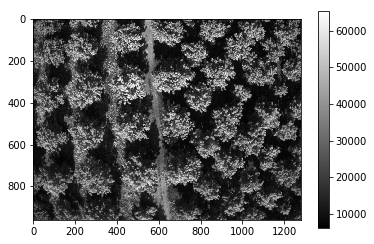

In [47]:
plt.imshow(all_bands[:,:,2],cmap='gray')
plt.colorbar()
plt.show()